In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
%matplotlib widget
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

from public_tests import * 

from autils import *
from lab_utils_softmax import plt_softmax
np.set_printoptions(precision=2)

2023-09-17 17:03:30.978775: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## ReLu and Softmax

This week, a new activation was introduced, the Rectified Linear Unit (ReLU). 
$$ a = max(0,z) \quad\quad\text { ReLU function} $$

2023-09-17 17:06:22.898576: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


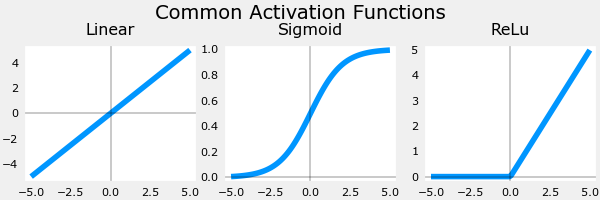

In [5]:
plt_act_trio()

### Exercise 1


In [6]:
# UNQ_C1
# GRADED CELL: my_softmax

def my_softmax(z):  
    """ Softmax converts a vector of values to a probability distribution.
    Args:
      z (ndarray (N,))  : input data, N features
    Returns:
      a (ndarray (N,))  : softmax of z
    """    
    ### START CODE HERE ### 
    maxz = np.max(z)
    ez = np.exp(z - maxz)
    a = ez / np.sum(ez)
    ### END CODE HERE ### 
    return a

In [7]:
z = np.array([1., 2., 3., 4.])
a = my_softmax(z)
atf = tf.nn.softmax(z)
print(f"my_softmax(z):         {a}")
print(f"tensorflow softmax(z): {atf}")

# BEGIN UNIT TEST  
test_my_softmax(my_softmax)
# END UNIT TEST  

my_softmax(z):         [0.03 0.09 0.24 0.64]
tensorflow softmax(z): [0.03 0.09 0.24 0.64]
 All tests passed.


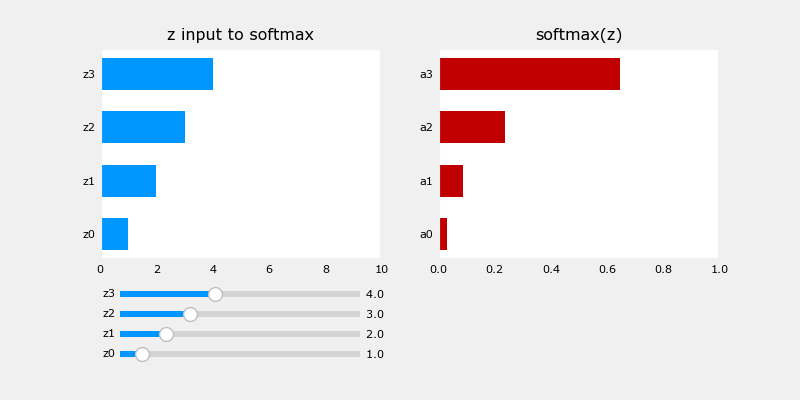

In [8]:
plt.close("all")
plt_softmax(my_softmax)

## Neural Networks

In [9]:
# load dataset
X, y = load_data()

In [11]:
print ('The first element of y is: ', y[0,0])
print ('The last element of y is: ', y[-1,0])

print ('The shape of X is: ' + str(X.shape))
print ('The shape of y is: ' + str(y.shape))

The first element of y is:  0
The last element of y is:  9
The shape of X is: (5000, 400)
The shape of y is: (5000, 1)


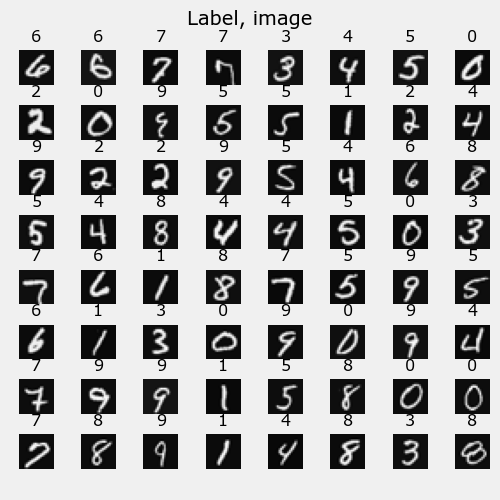

In [12]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]

#fig.tight_layout(pad=0.5)
widgvis(fig)
for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Display the label above the image
    ax.set_title(y[random_index,0])
    ax.set_axis_off()
    fig.suptitle("Label, image", fontsize=14)

### Exercise 2

In [17]:
# UNQ_C2
# GRADED CELL: Sequential model
tf.random.set_seed(1234) # for consistent results
model = Sequential(
    [               
        ### START CODE HERE ### 
        tf.keras.Input(shape=(400,)),    #specify input shape
        Dense(25, activation='relu', name = 'layer1'),
        Dense(15, activation='relu', name = 'layer2'),
        Dense(10, activation='linear', name = 'layer3')
        ### END CODE HERE ### 
    ], name = "my_model" 
)

model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 25)                10025     
                                                                 
 layer2 (Dense)              (None, 15)                390       
                                                                 
 layer3 (Dense)              (None, 10)                160       
                                                                 
Total params: 10,575
Trainable params: 10,575
Non-trainable params: 0
_________________________________________________________________


In [18]:
# BEGIN UNIT TEST     
test_model(model, 10, 400)
# END UNIT TEST  

All tests passed!


In [19]:
[layer1, layer2, layer3] = model.layers

#### Examine Weights shapes
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (400, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 10), b3 shape = (10,)


In [22]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
)

history = model.fit(
    X,y,
    epochs=53
)

Epoch 1/53
157/157 [==============================] - 1s 2ms/step - loss: 0.0016
Epoch 2/53
157/157 [==============================] - 0s 2ms/step - loss: 0.0049
Epoch 3/53
157/157 [==============================] - 0s 1ms/step - loss: 0.0028
Epoch 4/53
157/157 [==============================] - 0s 1ms/step - loss: 0.0016
Epoch 5/53
157/157 [==============================] - 0s 1ms/step - loss: 3.5696e-04
Epoch 6/53
157/157 [==============================] - 0s 2ms/step - loss: 2.5842e-04
Epoch 7/53
157/157 [==============================] - 0s 2ms/step - loss: 2.2420e-04
Epoch 8/53
157/157 [==============================] - 0s 1ms/step - loss: 2.0931e-04
Epoch 9/53
157/157 [==============================] - 0s 1ms/step - loss: 1.9441e-04
Epoch 10/53
157/157 [==============================] - 0s 1ms/step - loss: 1.8318e-04
Epoch 11/53
157/157 [==============================] - 0s 2ms/step - loss: 1.7399e-04
Epoch 12/53
157/157 [==============================] - 0s 2ms/step - loss: 1.66

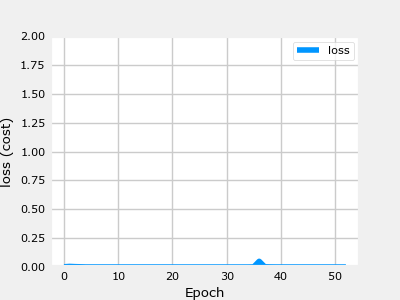

In [23]:
plot_loss_tf(history)

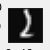

1/1 [==============================] - 0s 126ms/step
 predicting a Two: 
[[-18.11  -0.12   6.74  -2.02 -36.17 -12.45 -12.3   -6.26 -10.17 -31.8 ]]
 Largest Prediction index: 2


In [24]:
image_of_two = X[1015]
display_digit(image_of_two)

prediction = model.predict(image_of_two.reshape(1,400))  # prediction

print(f" predicting a Two: \n{prediction}")
print(f" Largest Prediction index: {np.argmax(prediction)}")

In [25]:
prediction_p = tf.nn.softmax(prediction)

print(f" predicting a Two. Probability vector: \n{prediction_p}")
print(f"Total of predictions: {np.sum(prediction_p):0.3f}")

 predicting a Two. Probability vector: 
[[1.61e-11 1.05e-03 9.99e-01 1.57e-04 2.32e-19 4.62e-09 5.40e-09 2.26e-06
  4.51e-08 1.83e-17]]
Total of predictions: 1.000


In [26]:
yhat = np.argmax(prediction_p)

print(f"np.argmax(prediction_p): {yhat}")

np.argmax(prediction_p): 2


1/1 [==============================] - 0s 20ms/step


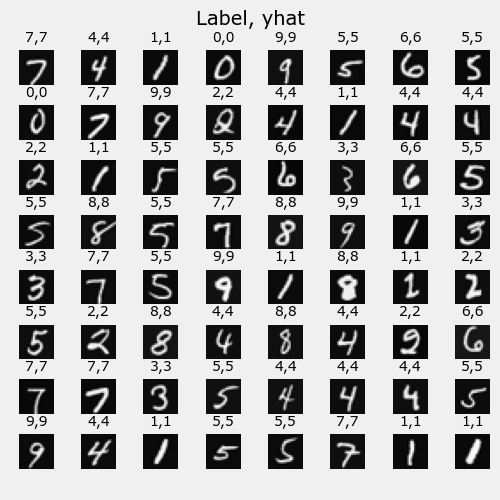

In [27]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]
widgvis(fig)
for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Predict using the Neural Network
    prediction = model.predict(X[random_index].reshape(1,400))
    prediction_p = tf.nn.softmax(prediction)
    yhat = np.argmax(prediction_p)
    
    # Display the label above the image
    ax.set_title(f"{y[random_index,0]},{yhat}",fontsize=10)
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=14)
plt.show()

In [28]:
print( f"{display_errors(model,X,y)} errors out of {len(X)} images")

157/157 [==============================] - 0s 1ms/step
no errors found
0 errors out of 5000 images
